In [150]:
#importing the needed libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
#reading/opening the csv file so work can be done on it
tweetsDf= pd.read_csv('Tweets.csv')

In [152]:
#shows all the columns in the data pre pre data cleaning
tweetsDf.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [153]:
#shows the first five rows of the untouched data
tweetsDf.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


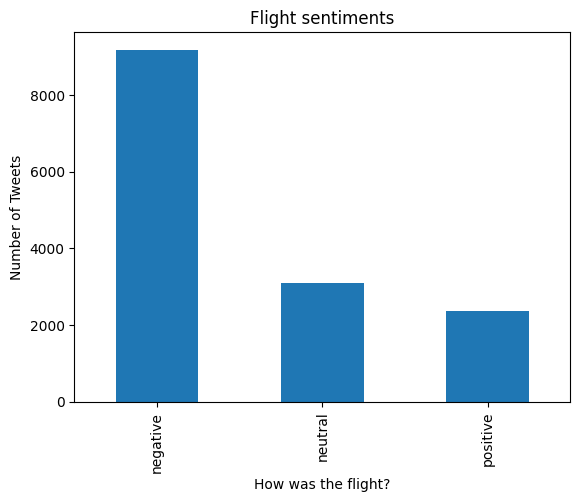

In [154]:
#We are now filtering the data and selecting the 'airline_sentiment' columns and getting the unique counts for each sentiment
negativeReason = tweetsDf['airline_sentiment'].value_counts()
#plotting the histogram
negativeReason.plot(kind='bar')
#Giving it a title
plt.title('Flight sentiments')
#label for the x-axis
plt.xlabel('How was the flight?')
#label for the y axis
plt.ylabel('Number of Tweets')
#Showing the plotted graph
plt.show()

In [155]:
#selecting ONLY the negative sentiments by airline
tweetsDf=tweetsDf[tweetsDf['airline_sentiment']== 'negative']

<Figure size 2000x4000 with 0 Axes>

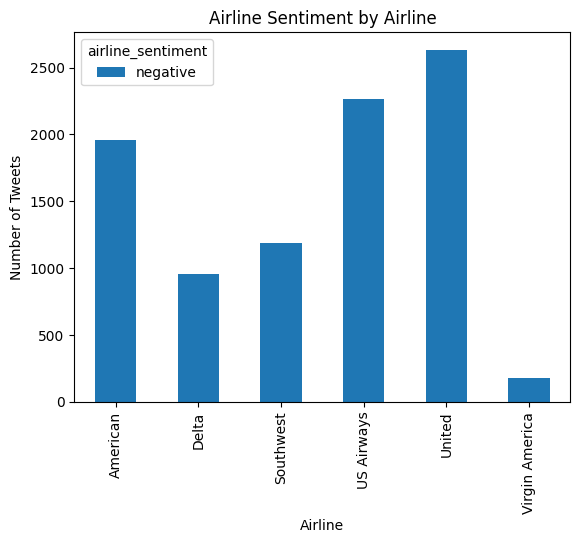

In [156]:
#grouping the alines and their sentiments and t and visualizing them
grouped = tweetsDf.groupby(['airline', 'airline_sentiment']).size().unstack()

fig = plt.figure(figsize = (20,40))
grouped.plot(kind='bar', stacked=True)
plt.title('Airline Sentiment by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.show()

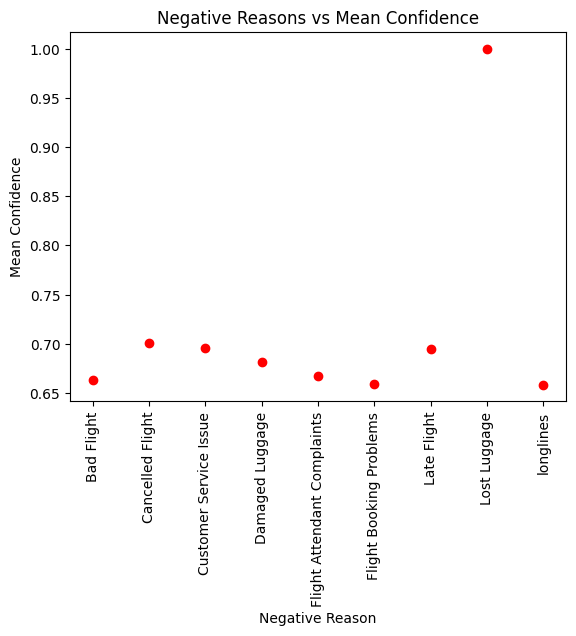

In [165]:
# group data by negative reason and compute median confidence
grouped_data = tweetsDf.groupby('negativereason')['negativereason_confidence'].median()

# create scatter plot
plt.scatter(grouped_data.index, grouped_data, c='red')
plt.xticks(rotation=90)
plt.xlabel('Negative Reason')
plt.ylabel('Mean Confidence')
plt.title('Negative Reasons vs Mean Confidence')
plt.show()

In [158]:
tweetsDf = tweetsDf.drop('airline_sentiment_gold', axis =1)
tweetsDf = tweetsDf.drop('name', axis =1)
tweetsDf = tweetsDf.drop('negativereason_gold', axis =1)
tweetsDf = tweetsDf.drop('retweet_count', axis =1)
tweetsDf = tweetsDf.drop('text', axis =1)
tweetsDf = tweetsDf.drop('tweet_coord', axis =1)
tweetsDf = tweetsDf.drop('tweet_created', axis =1)
tweetsDf = tweetsDf.drop('tweet_location', axis =1)
tweetsDf = tweetsDf.drop('user_timezone', axis =1)
tweetsDf = tweetsDf.drop('tweet_id', axis =1)

In [159]:
mask = tweetsDf['negativereason'].str.contains("Can't Tell", na=False)
print(len(tweetsDf[mask]), 'rows dropped')
tweetsDf = tweetsDf.drop(tweetsDf[mask].index)

1190 rows dropped


In [160]:
tweetsDf.head(10)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline
3,negative,1.0000,Bad Flight,0.7033,Virgin America
15,negative,0.6842,Late Flight,0.3684,Virgin America
17,negative,1.0000,Bad Flight,1.0000,Virgin America
24,negative,1.0000,Customer Service Issue,0.3557,Virgin America
25,negative,1.0000,Customer Service Issue,1.0000,Virgin America
28,negative,1.0000,Bad Flight,1.0000,Virgin America
30,negative,1.0000,Flight Booking Problems,1.0000,Virgin America
32,negative,1.0000,Customer Service Issue,1.0000,Virgin America
33,negative,1.0000,Customer Service Issue,1.0000,Virgin America
39,negative,1.0000,Customer Service Issue,1.0000,Virgin America


In [161]:
print(tweetsDf.isnull().sum())

# Check for empty spaces
for col in tweetsDf.columns:
    if tweetsDf[col].dtype == object:
        print(f"{col}: {tweetsDf[col].str.isspace().sum()}")

airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
dtype: int64
airline_sentiment: 0
negativereason: 0
airline: 0


In [162]:
bin = [0, 0.2, 0.4, 0.6, 0.9, 1]

tweetsDf['Airline_Conf_Bucket']= pd.cut(tweetsDf['airline_sentiment_confidence'], bin)

print('Airline_Conf_Bucket:\n',(tweetsDf['Airline_Conf_Bucket']).head())

Airline_Conf_Bucket:
 3     (0.9, 1.0]
15    (0.6, 0.9]
17    (0.9, 1.0]
24    (0.9, 1.0]
25    (0.9, 1.0]
Name: Airline_Conf_Bucket, dtype: category
Categories (5, interval[float64, right]): [(0.0, 0.2] < (0.2, 0.4] < (0.4, 0.6] < (0.6, 0.9] < (0.9, 1.0]]


In [163]:
bin = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

tweetsDf['NegReason_Conf_Bucket']= pd.cut(tweetsDf['negativereason_confidence'], bin)

print('NegReason_Conf_Bucket:\n',(tweetsDf['NegReason_Conf_Bucket']).head())

NegReason_Conf_Bucket:
 3     (0.7, 0.8]
15    (0.3, 0.4]
17    (0.9, 1.0]
24    (0.3, 0.4]
25    (0.9, 1.0]
Name: NegReason_Conf_Bucket, dtype: category
Categories (10, interval[float64, right]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]


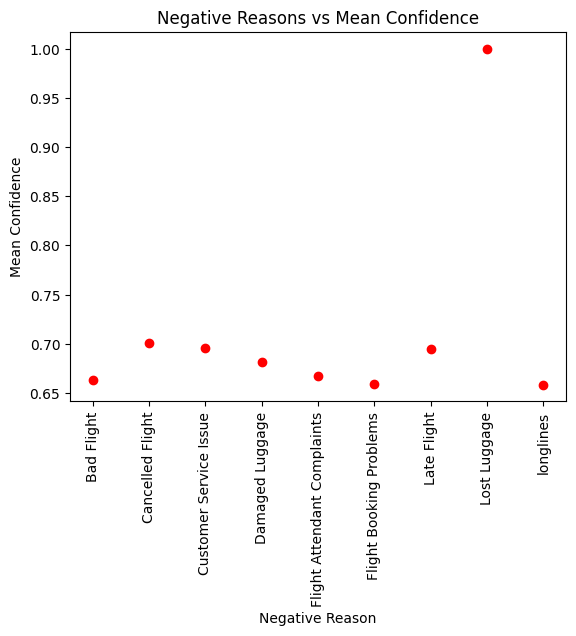

In [164]:
# group data by negative reason and compute median confidence(Post Col drops)
grouped_data = tweetsDf.groupby('negativereason')['negativereason_confidence'].median()

# create scatter plot
plt.scatter(grouped_data.index, grouped_data, c='red')
plt.xticks(rotation=90)
plt.xlabel('Negative Reason')
plt.ylabel('Mean Confidence')
plt.title('Negative Reasons vs Mean Confidence')
plt.show()

In [ ]:
tweetsDf=tweetsDf[tweetsDf['airline_sentiment_confidence'] > .5]
grouped= tweetsDf.groupby(['airline','airline_sentiment' ]).size().unstack()

fig = plt.figure(figsize = (20,40))
grouped.plot(kind='bar', stacked=False,)
plt.title('Airline Sentiment Confidence by Airline')
plt.xlabel('Airline')
plt.ylabel('Confidence Value')
plt.show()

In [ ]:
tweetsDf=tweetsDf[tweetsDf['negativereason_confidence'] > .5]
grouped= tweetsDf.groupby(['airline','negativereason' ]).size().unstack()

fig = plt.figure(figsize = (20,40))
grouped.plot(kind='bar', stacked=False)
plt.legend(fontsize=6)
plt.title('Tweet Sentiment Confidence by Airline')
plt.xlabel('Airline')
plt.ylabel('Confidence Value')
plt.show()

1. per airline, show % of neg reasons on  pie chart and 3 per slide.(done)
2. add heat map
3.Optional: bring back date and time and create a graph
4. start presentation work
5.go straight into alg (TBD)

In [ ]:
# filter dataframe to only include rows with specific airlines
airlines = ['Delta', 'United', 'American']
filtered_df = tweetsDf[tweetsDf['airline'].isin(airlines)]

# create a figure with one subplot for each airline
fig, axs = plt.subplots(1, len(airlines), figsize=(8 * len(airlines), 8))

# adjust spacing between subplots
fig.subplots_adjust(wspace=0.5)

# create a pie chart for each airline
for i, airline in enumerate(airlines):
    # filter data for the current airline
    airline_data = filtered_df[filtered_df['airline'] == airline]
    
    # group by negativereason
    grouped_data = airline_data.groupby('negativereason').size()
    
    # plot pie chart
    axs[i].pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%')
    axs[i].set_title(f'Distribution of negative reasons for {airline}')

plt.show()

In [ ]:
# filter dataframe to only include rows with specific airlines
airlines = ['Southwest', 'Virgin America', 'US Airways']
filtered_df = tweetsDf[tweetsDf['airline'].isin(airlines)]

# create a figure with one subplot for each airline
fig, axs = plt.subplots(1, len(airlines), figsize=(8 * len(airlines), 8))

# adjust spacing between subplots
fig.subplots_adjust(wspace=0.5)

# create a pie chart for each airline
for i, airline in enumerate(airlines):
    # filter data for the current airline
    airline_data = filtered_df[filtered_df['airline'] == airline]
    
    # group by negativereason
    grouped_data = airline_data.groupby('negativereason').size()
    
    # plot pie chart
    axs[i].pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%')
    axs[i].set_title(f'Distribution of negative reasons for {airline}')

plt.show()

In [ ]:
# create pivot table
pivot_table = tweetsDf.pivot_table(index='airline', columns='negativereason', values='negativereason_confidence')

# create heatmap
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)

# set plot title and axis labels
plt.title('Airline Sentiment by Negative Reason')
plt.xlabel('Negative Reason')
plt.ylabel('Airline')
plt.show()

# K-Means ALG has been choosen!

After using K-means clustering, we can use the cluster labels assigned to each data point to make predictions. For example, if we have a new data point and you want to predict which cluster it belongs to, we can use the K-means model to predict its cluster label based on its features.

Regarding our data, since we have already stripped out the positive and neutral sentiments and only have negative sentiments along with their reasons and confidence scores, we can use this data to perform K-means clustering. We can treat each negative reason as a feature, and each row in our data as a data point with a corresponding confidence score. We can then perform K-means clustering on this data to identify common negative reasons in the airline industry and their likelihood of occurring again based on the confidence scores.
